# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [23]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

Let's generate our dataset and take a look on it.

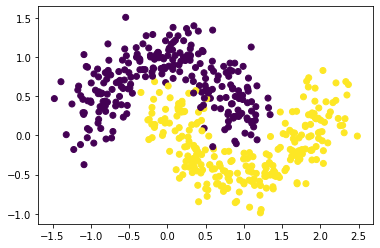

In [17]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [9]:
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def show_results(X, y, estimator, name):
    print('{} logloss  =\t{}'.format(name, 
                                    log_loss(y, estimator.predict_proba(X))))
    print('{} accuracy =\t{}'.format(name, 
                                     accuracy_score(y, estimator.predict(X))))
    
    plt.figure(figsize=(13, 7))
    plot_decision_regions(X=X, y=y, clf=estimator, legend=2)
    plt.title(name, fontsize=24)
    plt.show()

/Users/alex-kozinov/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


log. regression logloss  =	0.28302561365623274
log. regression accuracy =	0.856


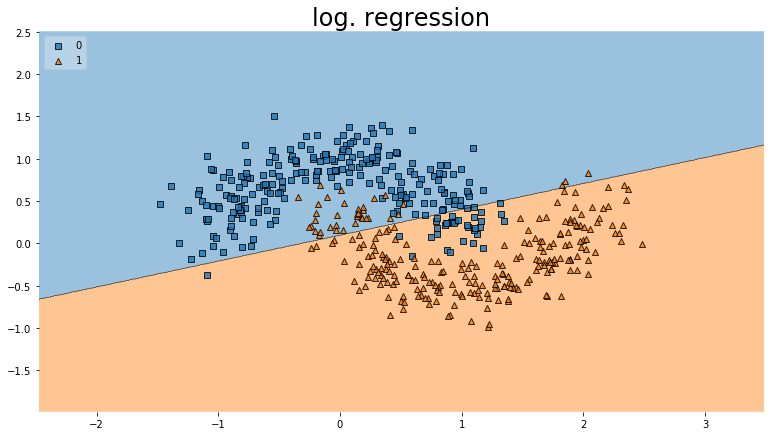

svm logloss  =	0.28227727803823655
svm accuracy =	0.858


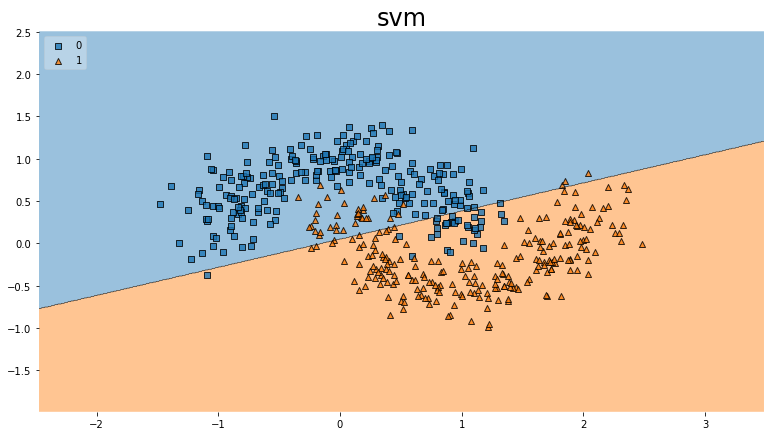

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear', probability=True) # here too

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

show_results(moons_points, moons_labels, lr, "log. regression")
show_results(moons_points, moons_labels, svm, "svm")

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [18]:
def find_best_SVM(X, y, kernel_name):
    params = {'kernel': [kernel_name], 'C': np.linspace(0.01, 6, 60), 'degree' : np.arange(1, 15)}
    grid_s = GridSearchCV(SVC(gamma='auto', probability=True), params, scoring='neg_log_loss', 
                        n_jobs=-1, cv=3, iid=True)
    
    grid_s.fit(X, y)
    
    print('Optimal degree =\t{}'.format(grid_s.best_params_["degree"]))
    show_results(X, y, grid_s.best_estimator_, "SVM with kernel " + kernel_name)

Optimal degree =	3
SVM with kernel poly logloss  =	0.2673030242246923
SVM with kernel poly accuracy =	0.908


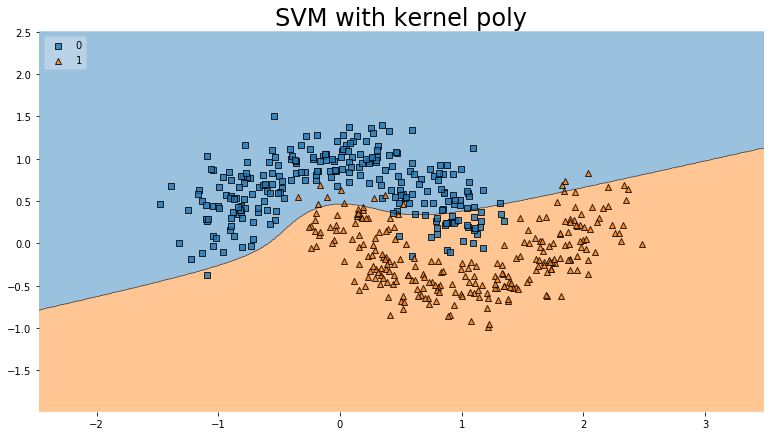

In [19]:
find_best_SVM(moons_points, moons_labels, 'poly')


Optimal degree =	8
SVM with kernel rbf logloss  =	0.06490202486796187
SVM with kernel rbf accuracy =	0.972


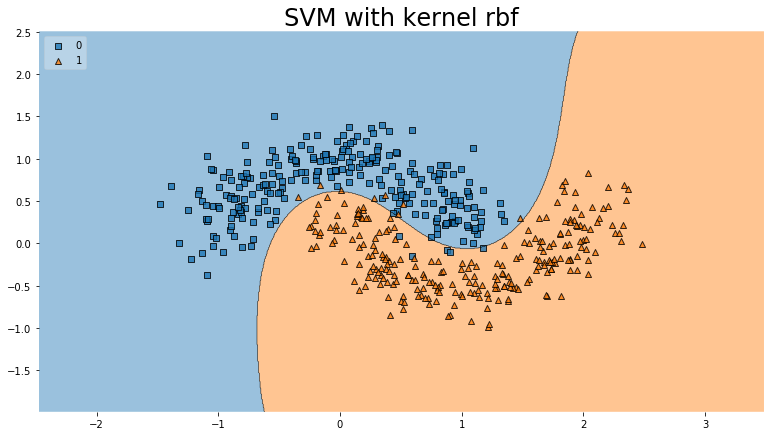

In [20]:
find_best_SVM(moons_points, moons_labels, 'rbf')


Optimal degree =	3
SVM with kernel sigmoid logloss  =	0.3625744795302861
SVM with kernel sigmoid accuracy =	0.798


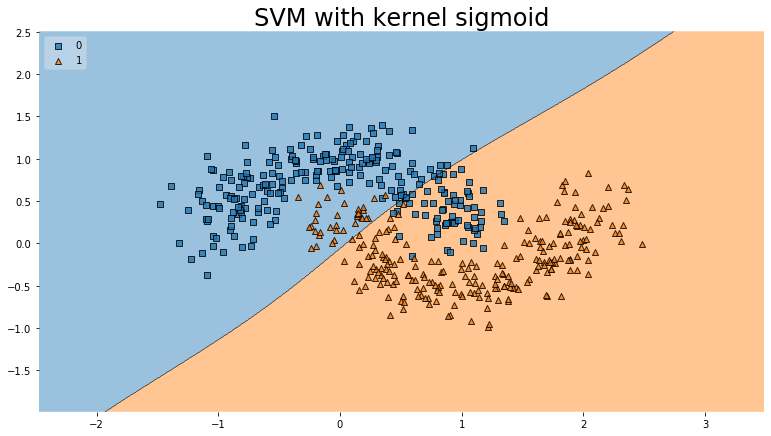

In [21]:
find_best_SVM(moons_points, moons_labels, 'sigmoid')


**Вывод:**
    
* Значение точности разное для различных ядер. Но лучше всего себя показывает SVM с ядром rbf. Показатель точности для которого 0.974
* В каждом примере граница нелинейна, а имеет вид кривой
* Встречаются разные степени у ядер: 1, 3, 5 для sigmoid, poly и rbf соответсвенно.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/Users/alex-kozinov/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Optimal PolinomialDegree =	3
Logistic Regression with polinomial features logloss  =	0.07635875133808949
Logistic Regression with polinomial features accuracy =	0.974


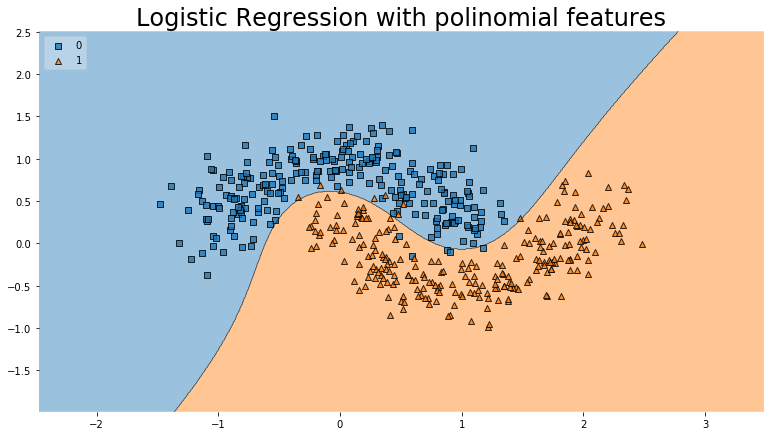

In [24]:
from sklearn.preprocessing import PolynomialFeatures

pline = Pipeline([
    ('pf', PolynomialFeatures()),
    ('lr', LogisticRegression(solver='saga', max_iter=450))
])

params = {'pf__degree': np.arange(1, 15), 'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 3, 60)}
grid_s = GridSearchCV(pline, params, scoring='neg_log_loss', n_jobs=-1, cv=3, iid=True)
grid_s.fit(moons_points, moons_labels)

print('Optimal PolinomialDegree =\t{}'.format(grid_s.best_params_["pf__degree"]))


show_results(moons_points, moons_labels, grid_s.best_estimator_, "Logistic Regression with polinomial features")

**Вывод:**
* Можно заметить, что результирующие точности у Логистической регрессии и SVM почти одинаковые. И границы очень похожи

* Но при этом Логистическая регрессия использует полиномиальные коэффициенты степени не больше 3, а SVM с ядром rbf 10

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

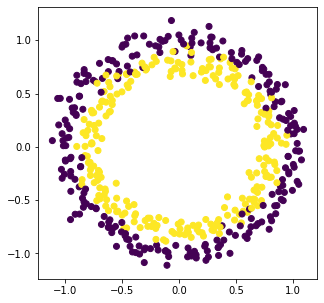

In [25]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

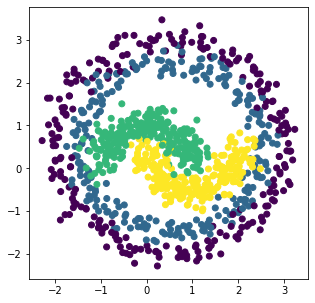

In [26]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

**Начнём исследовать Логистическую регрессию с разными полиноминальными фичами**

* Просто без дополнительных фич (степень 1)


Logistic Regression with polinomial features logloss  =	1.3154691532853153
Logistic Regression with polinomial features accuracy =	0.401


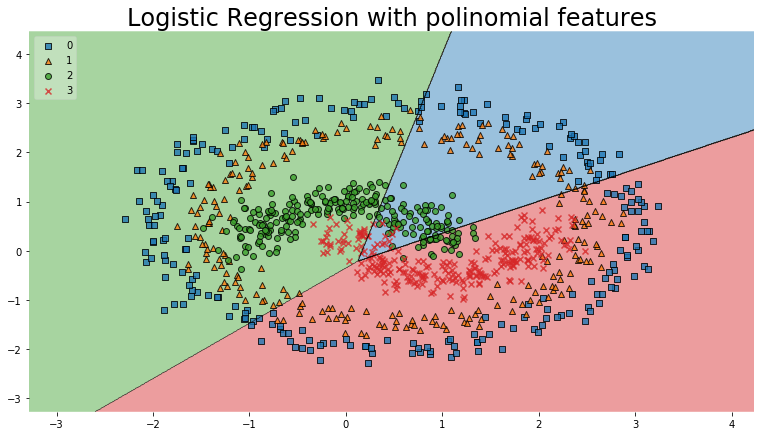

In [27]:
pline = Pipeline([
    ('pf', PolynomialFeatures(degree=1)),
    ('lr', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=500))
])

params = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 2, 30)}
grid_s = GridSearchCV(pline, params, scoring='neg_log_loss', n_jobs=-1, cv=3, iid=True)
grid_s.fit(points, labels)


show_results(points, labels, grid_s.best_estimator_, "Logistic Regression with polinomial features")

* Квадратичные фичи (степень 2)

/Users/alex-kozinov/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression with polinomial features logloss  =	0.2689784321317779
Logistic Regression with polinomial features accuracy =	0.88


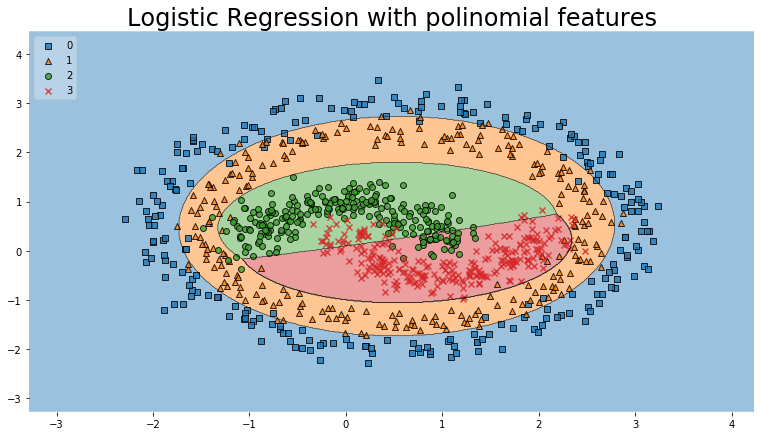

In [28]:
pline = Pipeline([
    ('pf', PolynomialFeatures(degree=2)),
    ('lr', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=500))
])

params = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 2, 30)}
grid_s = GridSearchCV(pline, params, scoring='neg_log_loss', n_jobs=-1, cv=3, iid=True)
grid_s.fit(points, labels)


show_results(points, labels, grid_s.best_estimator_, "Logistic Regression with polinomial features")

* Кубические фичи (степень 3)

/Users/alex-kozinov/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression with polinomial features logloss  =	0.2599411084145827
Logistic Regression with polinomial features accuracy =	0.91


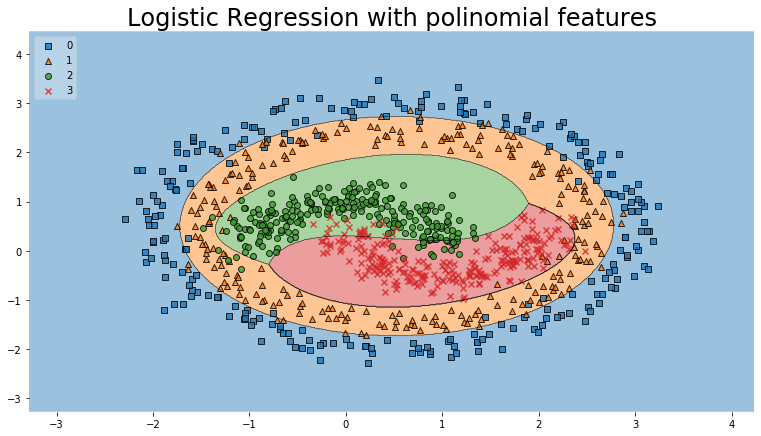

In [29]:

pline = Pipeline([
    ('pf', PolynomialFeatures(degree=3)),
    ('lr', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=500))
])

params = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 2, 30)}
grid_s = GridSearchCV(pline, params, scoring='neg_log_loss', n_jobs=-1, cv=3, iid=True)
grid_s.fit(points, labels)


show_results(points, labels, grid_s.best_estimator_, "Logistic Regression with polinomial features")

* Фичи четвёртой степени

/Users/alex-kozinov/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression with polinomial features logloss  =	0.2914270336886121
Logistic Regression with polinomial features accuracy =	0.899


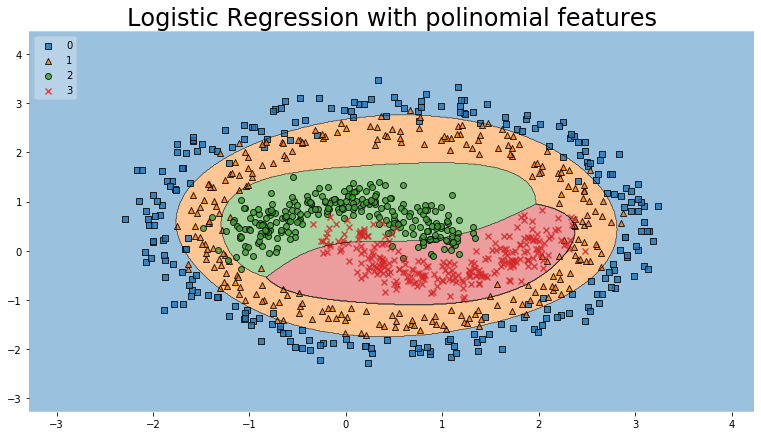

In [30]:
pline = Pipeline([
    ('pf', PolynomialFeatures(degree=4)),
    ('lr', LogisticRegression(solver='saga', multi_class='multinomial', max_iter=500))
])

params = {'lr__penalty': ['l1', 'l2'], 'lr__C' : np.linspace(0.01, 2, 30)}
grid_s = GridSearchCV(pline, params, scoring='neg_log_loss', n_jobs=-1, cv=3, iid=True)
grid_s.fit(points, labels)


show_results(points, labels, grid_s.best_estimator_, "Logistic Regression with polinomial features")


**Вывод:** Можно заметить, что изменение в точности при использовании четвёртых степений незначительный, а значит можно считать, что модель с кубическими степенями - оптимальная c  accuracy = 0.921

**Попробуем использовать SVM с успешно себя показавшим в первой половине ядром rbf**

Optimal degree =	7
SVM with kernel rbf logloss  =	0.16010408368562035
SVM with kernel rbf accuracy =	0.938


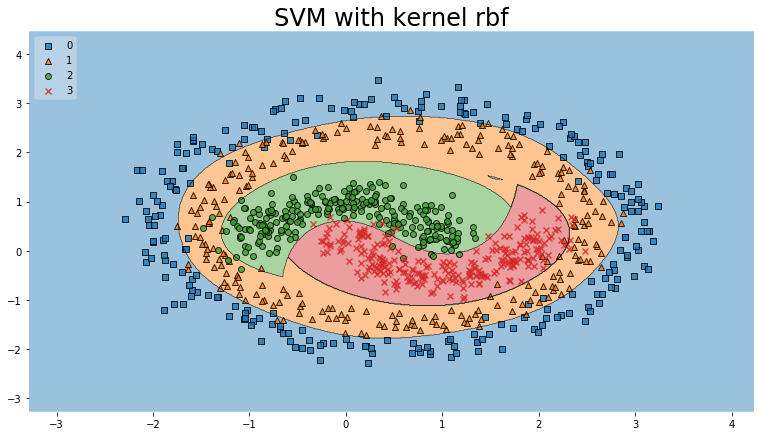

In [32]:
find_best_SVM(points, labels, 'rbf')
